In [ ]:
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    sys.path.append('./BLIP')

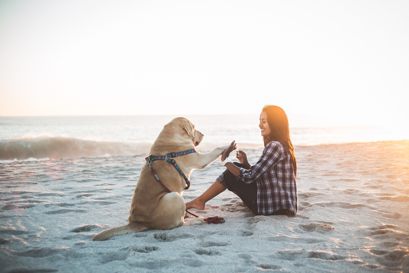

In [2]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

w,h = raw_image.size
display(raw_image.resize((w//5,h//5)))

# Image Captioning

In [7]:
from models.blip import blip_decoder

image_size = 384
transform = transforms.Compose([
    transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ]) 
image = transform(raw_image).unsqueeze(0).to(device)     

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth'
    
model = blip_decoder(pretrained=model_url, image_size=384, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
    print('caption: '+caption[0])

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth
caption: a woman sitting on the beach with a dog


# VQA

In [8]:
from models.blip_vqa import blip_vqa

image_size = 480
transform = transforms.Compose([
    transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ]) 
image = transform(raw_image).unsqueeze(0).to(device)        

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_vqa.pth'
    
model = blip_vqa(pretrained=model_url, image_size=480, vit='base')
model.eval()
model = model.to(device)

question = 'where is the woman sitting?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate') 
    print('answer: '+answer[0])

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_vqa.pth
answer: on beach
